In [1]:
import xarray as xr
import numpy as np
import datetime
import matplotlib.pyplot as plt


In [2]:
# most recent forecast
url = 'http://fvcom.smast.umassd.edu:8080/thredds/dodsC/FVCOM/NECOFS/Forecasts/NECOFS_GOM3_FORECAST.nc'
ds = xr.open_dataset(url, drop_variables='siglay')

# 30-year hindcast, irivers, but no tides
# url = 'http://fvcom.smast.umassd.edu:8080/thredds/dodsC/fvcom/hindcasts/30yr_gom3'
# ds = xr.open_dataset(url, drop_variables=('siglev','siglay'),decode_times=False)

In [3]:
ds

<xarray.Dataset>
Dimensions:      (nele: 99137, node: 53087, siglay: 40, three: 3, time: 145)
Coordinates:
    lon          (node) float32 ...
    lat          (node) float32 ...
    lonc         (nele) float32 ...
    latc         (nele) float32 ...
  * time         (time) datetime64[ns] 2021-11-27 ... 2021-12-03
Dimensions without coordinates: nele, node, siglay, three
Data variables:
    x            (node) float32 ...
    y            (node) float32 ...
    xc           (nele) float32 ...
    yc           (nele) float32 ...
    h            (node) float32 ...
    nv           (three, nele) int32 ...
    Times        (time) |S64 ...
    zeta         (time, node) float32 ...
    nbe          (three, nele) int32 ...
    aw0          (three, nele) float32 ...
    awx          (three, nele) float32 ...
    awy          (three, nele) float32 ...
    u            (time, siglay, nele) float32 ...
    v            (time, siglay, nele) float32 ...
    ww           (time, siglay, nele) float32 ...
    ua           (time, nele) float32 ...
    va           (time, nele) float32 ...
    temp         (time, siglay, node) float32 ...
    salinity     (time, siglay, node) float32 ...
    icing_0kts   (time, node) float32 ...
    icing_10kts  (time, node) float32 ...
    fvcom_mesh   int32 ...
Attributes:
    title:                           NECOFS GOM3 (FVCOM) - Northeast US - Lat...
    institution:                     School for Marine Science and Technology
    source:                          FVCOM_3.0
    history:                         Sun Nov 28 06:16:28 2021: ncrcat -O -v x...
    references:                      http://fvcom.smast.umassd.edu, http://co...
    Conventions:                     CF-1.0, UGRID-1.0
    CoordinateSystem:                Cartesian
    CoordinateProjection:            init=nad83:1802
    Tidal_Forcing:                   Tidal Forcing Time Series Title: JULIAN ...
    River_Forcing:                   THERE ARE NO RIVERS IN THIS MODEL
    GroundWater_Forcing:             GROUND WATER FORCING IS OFF!
    Surface_Heat_Forcing:            FVCOM variable surface heat forcing file...
    Surface_Wind_Forcing:            FVCOM variable surface Wind forcing:\nFI...
    Surface_PrecipEvap_Forcing:      FVCOM periodic surface precip forcing:\n...
    Icing_Model_Forcing:             FVCOM variable surface icing forcing:\nF...
    Special_Physical_processes:      long shore flow adjustment for thermal w...
    nco_openmp_thread_number:        1
    summary:                         Latest forecast from the FVCOM Northeast...
    DODS.strlen:                     26
    DODS.dimName:                    DateStrLen
    DODS_EXTRA.Unlimited_Dimension:  time

In [4]:
print(ds.time[0].values)
print(ds.time[-1].values)

2021-11-27T00:00:00.000000000
2021-12-03T00:00:00.000000000


In [5]:
# Find the indices of the points in (x,y) closest to the points in (xi,yi)
def nearxyn(x,y,xi,yi):    
    ind=np.ones(len(xi),dtype=int)
    for i in np.arange(len(xi)):
        dist=np.sqrt((x-xi[i])**2+(y-yi[i])**2)
        ind[i]=dist.argmin()    
    return ind

# Find the indices of the point in (x,y) closest to the point (xi,yi)
def nearxy(x,y,xi,yi):
    dist=np.sqrt((x-xi)**2+(y-yi)**2)
    ind=dist.argmin()     
    return ind

coords = [-70.0643, 42.0643]

# Query to find closest NECOFS nodes to station locations
nodeid = nearxy(ds.lon,ds.lat,coords[0],coords[1])
print(ds.lon[nodeid].values,ds.lat[nodeid].values,ds.h[nodeid].values)

-70.05605 42.06413 26.329


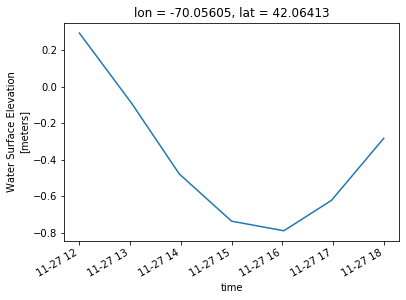

In [6]:
# pick a specific time
ds.sel(time="2021-11-27T12:00:00.000000")
# or a time slice
dst = ds.sel(time=slice("2021-11-27T12:00:00.000000","2021-11-27T18:00:00.000000"))

# could grab as arrays and plot
#t = dst.time[:].values
#zeta = dst.zeta[:,nodeid].values
#plt.plot(t,zeta)

# but this is easier
zeta = dst.zeta[:,nodeid]
zeta.plot()